In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("weather_linear_regression_10000.csv")
df.info()
df.columns
df.describe()
df.shape
print(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 10000 non-null  str    
 1   humidity_percent     10000 non-null  float64
 2   pressure_hpa         10000 non-null  float64
 3   wind_speed_kmph      10000 non-null  float64
 4   cloud_cover_percent  10000 non-null  float64
 5   rainfall_mm          10000 non-null  float64
 6   sunshine_hours       10000 non-null  float64
 7   temperature_c        10000 non-null  float64
dtypes: float64(7), str(1)
memory usage: 625.1 KB
         date  humidity_percent  pressure_hpa  wind_speed_kmph  \
0  2015-01-01         49.963210   1006.154857        29.199932   
1  2015-01-02         96.057145   1003.303847         7.380480   
2  2015-01-03         78.559515    992.330774        13.865588   
3  2015-01-04         67.892679   1022.508667        26.531225   
4  2015-01-05         32

In [3]:
df["humidity_percent_log"] = np.log(df["humidity_percent"] + 1)
df["pressure_hpa_log"] = np.log(df["pressure_hpa"] + 1)
df["wind_speed_kmph_log"] = np.log(df["wind_speed_kmph"] + 1)
df["cloud_cover_percent_log"] = np.log(df["cloud_cover_percent"] + 1)
df["rainfall_mm_log"] = np.log(df["rainfall_mm"] + 1)
df["sunshine_hours_log"] = np.log(df["sunshine_hours"] + 1)
df["temperature_c_log"] = np.log(df["temperature_c"] + 1)

df.head()

,date,humidity_percent,pressure_hpa,wind_speed_kmph,cloud_cover_percent,rainfall_mm,sunshine_hours,temperature_c,humidity_percent_log,pressure_hpa_log,wind_speed_kmph_log,cloud_cover_percent_log,rainfall_mm_log,sunshine_hours_log,temperature_c_log
0,2015-01-01,49.963210,1006.154857,29.199932,63.814457,14.945602,10.166839,63.40,3.931104,6.914885,3.407840,4.171529,2.769183,2.412949,4.165114
1,2015-01-02,96.057145,1003.303847,7.380480,45.929245,4.740889,5.934205,59.14,4.575300,6.912050,2.125905,3.848641,1.747614,1.936466,4.096675
2,2015-01-03,78.559515,992.330774,13.865588,96.449852,6.317961,2.345587,47.76,4.376505,6.901064,2.699049,4.579338,1.990332,1.207642,3.886910
3,2015-01-04,67.892679,1022.508667,26.531225,21.897845,9.033556,8.839701,65.66,4.232550,6.930992,3.315321,3.131043,2.305935,2.286425,4.199605
4,2015-01-05,32.481491,1013.363691,19.283574,58.785642,10.182667,5.024138,65.40,3.510993,6.922017,3.009811,4.090766,2.414365,1.795774,4.195697


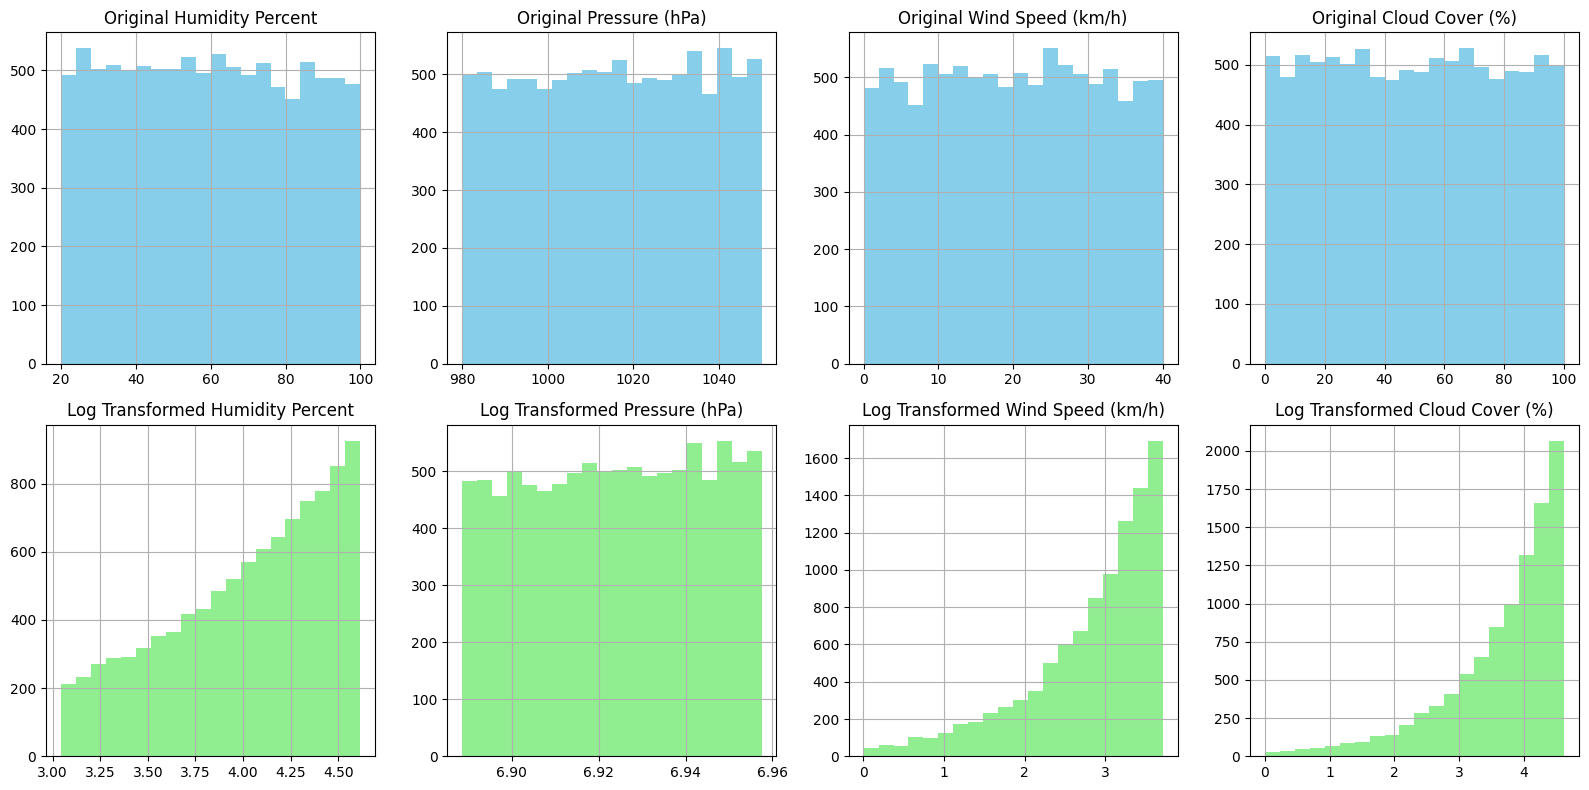

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

df['humidity_percent'].hist(bins=20, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Original Humidity Percent')

df['pressure_hpa'].hist(bins=20, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Original Pressure (hPa)')

df['wind_speed_kmph'].hist(bins=20, ax=axs[0, 2], color='skyblue')
axs[0, 2].set_title('Original Wind Speed (km/h)')

df['cloud_cover_percent'].hist(bins=20, ax=axs[0, 3], color='skyblue')
axs[0, 3].set_title('Original Cloud Cover (%)')

df['humidity_percent_log'].hist(bins=20, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Log Transformed Humidity Percent')

df['pressure_hpa_log'].hist(bins=20, ax=axs[1, 1], color='lightgreen')
axs[1, 1].set_title('Log Transformed Pressure (hPa)')

df['wind_speed_kmph_log'].hist(bins=20, ax=axs[1, 2], color='lightgreen')
axs[1, 2].set_title('Log Transformed Wind Speed (km/h)')

df['cloud_cover_percent_log'].hist(bins=20, ax=axs[1, 3], color='lightgreen')
axs[1, 3].set_title('Log Transformed Cloud Cover (%)')

plt.tight_layout()
plt.show()

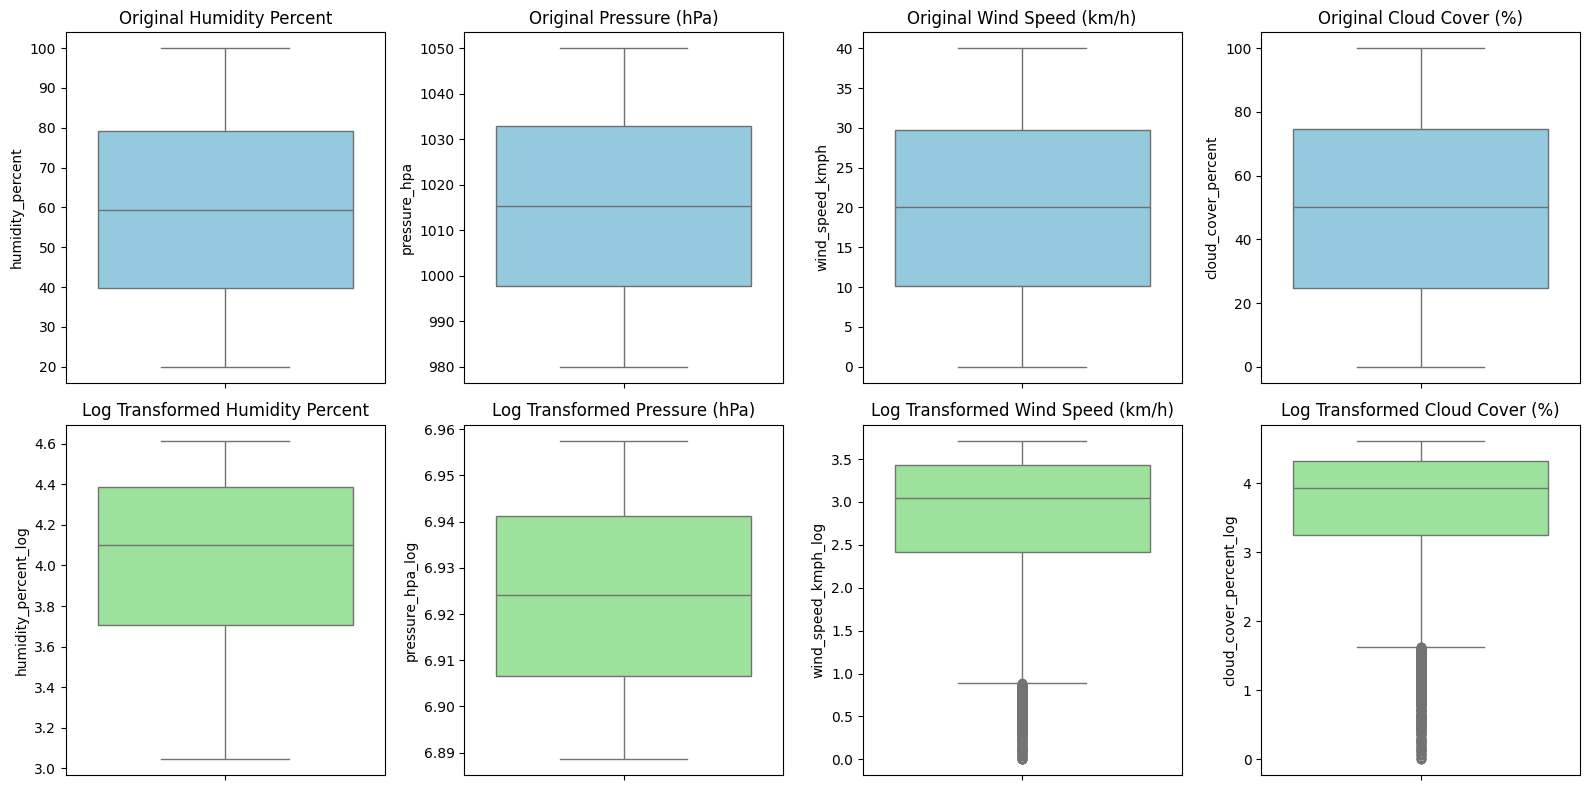

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

sns.boxplot(data=df['humidity_percent'], ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Original Humidity Percent')

sns.boxplot(data=df['pressure_hpa'], ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Original Pressure (hPa)')

sns.boxplot(data=df['wind_speed_kmph'], ax=axs[0, 2], color='skyblue')
axs[0, 2].set_title('Original Wind Speed (km/h)')

sns.boxplot(data=df['cloud_cover_percent'], ax=axs[0, 3], color='skyblue')
axs[0, 3].set_title('Original Cloud Cover (%)')

sns.boxplot(data=df['humidity_percent_log'], ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Log Transformed Humidity Percent')

sns.boxplot(data=df['pressure_hpa_log'], ax=axs[1, 1], color='lightgreen')
axs[1, 1].set_title('Log Transformed Pressure (hPa)')

sns.boxplot(data=df['wind_speed_kmph_log'], ax=axs[1, 2], color='lightgreen')
axs[1, 2].set_title('Log Transformed Wind Speed (km/h)')

sns.boxplot(data=df['cloud_cover_percent_log'], ax=axs[1, 3], color='lightgreen')
axs[1, 3].set_title('Log Transformed Cloud Cover (%)')

plt.tight_layout()
plt.show()

In [6]:
print(df.isnull().sum())

date                       0
humidity_percent           0
pressure_hpa               0
wind_speed_kmph            0
cloud_cover_percent        0
rainfall_mm                0
sunshine_hours             0
temperature_c              0
humidity_percent_log       0
pressure_hpa_log           0
wind_speed_kmph_log        0
cloud_cover_percent_log    0
rainfall_mm_log            0
sunshine_hours_log         0
temperature_c_log          0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df['hot_day'] = (df['temperature_c'] > 60).astype(int)

In [9]:
X = df.drop(['date', 'temperature_c', 'hot_day'], axis=1)  # drop date & original temp
y = df['hot_day']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9872

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1531
           1       0.98      0.99      0.98       969

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

